## UM atmosphere data loading and plotting with Iris

In [21]:
import os
import os.path

import iris
import iris.quickplot as qplt
import matplotlib.pyplot as plt

In [4]:
TOP_LEVEL_DIRECTORY = "/scratch/jseddon/cdds_data/EERIE/EERIE/HadGEM3-GC5-EERIE-N640-ORCA12/eerie-piControl/r1i1p1f1/round-3/output"

In [6]:
def load_callback(cube, field, filename):
    """
    An Iris load callback function to delete a few metadata items that will
    prevent the files from being merged into a single cube.
    """
    attributes_to_remove = [
        "creation_date",
        "history",
        "tracking_id"
    ]
    for attr_name in attributes_to_remove:
        del(cube.attributes[attr_name])

In [7]:
tas_files = [
    "ap1_mip_convert/1851-01-01/atmos-native/tas_Amon_HadGEM3-GC5-EERIE-N640-ORCA12_eerie-piControl_r1i1p1f1_gn_185101-185112.nc",
    "ap1_mip_convert/1852-01-01/atmos-native/tas_Amon_HadGEM3-GC5-EERIE-N640-ORCA12_eerie-piControl_r1i1p1f1_gn_185201-185212.nc",
    # "ap1_mip_convert/1853-01-01/atmos-native/tas_Amon_HadGEM3-GC5-EERIE-N640-ORCA12_eerie-piControl_r1i1p1f1_gn_185301-185312.nc",
    # "ap1_mip_convert/1854-01-01/atmos-native/tas_Amon_HadGEM3-GC5-EERIE-N640-ORCA12_eerie-piControl_r1i1p1f1_gn_185401-185412.nc",
    # "ap1_mip_convert/1855-01-01/atmos-native/tas_Amon_HadGEM3-GC5-EERIE-N640-ORCA12_eerie-piControl_r1i1p1f1_gn_185501-185512.nc",
    # "ap1_mip_convert/1856-01-01/atmos-native/tas_Amon_HadGEM3-GC5-EERIE-N640-ORCA12_eerie-piControl_r1i1p1f1_gn_185601-185612.nc",
    # "ap1_mip_convert/1857-01-01/atmos-native/tas_Amon_HadGEM3-GC5-EERIE-N640-ORCA12_eerie-piControl_r1i1p1f1_gn_185701-185712.nc",
    # "ap1_mip_convert/1858-01-01/atmos-native/tas_Amon_HadGEM3-GC5-EERIE-N640-ORCA12_eerie-piControl_r1i1p1f1_gn_185801-185812.nc",
    # "ap1_mip_convert/1859-01-01/atmos-native/tas_Amon_HadGEM3-GC5-EERIE-N640-ORCA12_eerie-piControl_r1i1p1f1_gn_185901-185912.nc",
    # "ap1_mip_convert/1860-01-01/atmos-native/tas_Amon_HadGEM3-GC5-EERIE-N640-ORCA12_eerie-piControl_r1i1p1f1_gn_186001-186012.nc",
    # "ap1_mip_convert/1861-01-01/atmos-native/tas_Amon_HadGEM3-GC5-EERIE-N640-ORCA12_eerie-piControl_r1i1p1f1_gn_186101-186112.nc",
    # "ap1_mip_convert/1862-01-01/atmos-native/tas_Amon_HadGEM3-GC5-EERIE-N640-ORCA12_eerie-piControl_r1i1p1f1_gn_186201-186212.nc",
    # "ap1_mip_convert/1863-01-01/atmos-native/tas_Amon_HadGEM3-GC5-EERIE-N640-ORCA12_eerie-piControl_r1i1p1f1_gn_186301-186312.nc",
    # "ap1_mip_convert/1864-01-01/atmos-native/tas_Amon_HadGEM3-GC5-EERIE-N640-ORCA12_eerie-piControl_r1i1p1f1_gn_186401-186412.nc",
    # "ap1_mip_convert/1865-01-01/atmos-native/tas_Amon_HadGEM3-GC5-EERIE-N640-ORCA12_eerie-piControl_r1i1p1f1_gn_186501-186512.nc",
    # "ap1_mip_convert/1866-01-01/atmos-native/tas_Amon_HadGEM3-GC5-EERIE-N640-ORCA12_eerie-piControl_r1i1p1f1_gn_186601-186612.nc",
    # "ap1_mip_convert/1867-01-01/atmos-native/tas_Amon_HadGEM3-GC5-EERIE-N640-ORCA12_eerie-piControl_r1i1p1f1_gn_186701-186712.nc",
    # "ap1_mip_convert/1868-01-01/atmos-native/tas_Amon_HadGEM3-GC5-EERIE-N640-ORCA12_eerie-piControl_r1i1p1f1_gn_186801-186812.nc",
    # "ap1_mip_convert/1869-01-01/atmos-native/tas_Amon_HadGEM3-GC5-EERIE-N640-ORCA12_eerie-piControl_r1i1p1f1_gn_186901-186912.nc",
    # "ap1_mip_convert/1870-01-01/atmos-native/tas_Amon_HadGEM3-GC5-EERIE-N640-ORCA12_eerie-piControl_r1i1p1f1_gn_187001-187012.nc",
    # "ap1_mip_convert/1871-01-01/atmos-native/tas_Amon_HadGEM3-GC5-EERIE-N640-ORCA12_eerie-piControl_r1i1p1f1_gn_187101-187112.nc",
    # "ap1_mip_convert/1872-01-01/atmos-native/tas_Amon_HadGEM3-GC5-EERIE-N640-ORCA12_eerie-piControl_r1i1p1f1_gn_187201-187212.nc",
    # "ap1_mip_convert/1873-01-01/atmos-native/tas_Amon_HadGEM3-GC5-EERIE-N640-ORCA12_eerie-piControl_r1i1p1f1_gn_187301-187312.nc",
    # "ap1_mip_convert/1874-01-01/atmos-native/tas_Amon_HadGEM3-GC5-EERIE-N640-ORCA12_eerie-piControl_r1i1p1f1_gn_187401-187412.nc",
    # "ap1_mip_convert/1875-01-01/atmos-native/tas_Amon_HadGEM3-GC5-EERIE-N640-ORCA12_eerie-piControl_r1i1p1f1_gn_187501-187512.nc",
    # "ap1_mip_convert/1876-01-01/atmos-native/tas_Amon_HadGEM3-GC5-EERIE-N640-ORCA12_eerie-piControl_r1i1p1f1_gn_187601-187612.nc",
    # "ap1_mip_convert/1877-01-01/atmos-native/tas_Amon_HadGEM3-GC5-EERIE-N640-ORCA12_eerie-piControl_r1i1p1f1_gn_187701-187712.nc",
    # "ap1_mip_convert/1878-01-01/atmos-native/tas_Amon_HadGEM3-GC5-EERIE-N640-ORCA12_eerie-piControl_r1i1p1f1_gn_187801-187812.nc",
    # "ap1_mip_convert/1879-01-01/atmos-native/tas_Amon_HadGEM3-GC5-EERIE-N640-ORCA12_eerie-piControl_r1i1p1f1_gn_187901-187912.nc",
    # "ap1_mip_convert/1880-01-01/atmos-native/tas_Amon_HadGEM3-GC5-EERIE-N640-ORCA12_eerie-piControl_r1i1p1f1_gn_188001-188012.nc",
    # "ap1_mip_convert/1881-01-01/atmos-native/tas_Amon_HadGEM3-GC5-EERIE-N640-ORCA12_eerie-piControl_r1i1p1f1_gn_188101-188112.nc",
    # "ap1_mip_convert/1882-01-01/atmos-native/tas_Amon_HadGEM3-GC5-EERIE-N640-ORCA12_eerie-piControl_r1i1p1f1_gn_188201-188212.nc",
    # "ap1_mip_convert/1883-01-01/atmos-native/tas_Amon_HadGEM3-GC5-EERIE-N640-ORCA12_eerie-piControl_r1i1p1f1_gn_188301-188312.nc",
    # "ap1_mip_convert/1884-01-01/atmos-native/tas_Amon_HadGEM3-GC5-EERIE-N640-ORCA12_eerie-piControl_r1i1p1f1_gn_188401-188412.nc",
    # "ap1_mip_convert/1885-01-01/atmos-native/tas_Amon_HadGEM3-GC5-EERIE-N640-ORCA12_eerie-piControl_r1i1p1f1_gn_188501-188512.nc",
    # "ap1_mip_convert/1886-01-01/atmos-native/tas_Amon_HadGEM3-GC5-EERIE-N640-ORCA12_eerie-piControl_r1i1p1f1_gn_188601-188612.nc",
    # "ap1_mip_convert/1887-01-01/atmos-native/tas_Amon_HadGEM3-GC5-EERIE-N640-ORCA12_eerie-piControl_r1i1p1f1_gn_188701-188712.nc",
    # "ap1_mip_convert/1888-01-01/atmos-native/tas_Amon_HadGEM3-GC5-EERIE-N640-ORCA12_eerie-piControl_r1i1p1f1_gn_188801-188812.nc",
    # "ap1_mip_convert/1889-01-01/atmos-native/tas_Amon_HadGEM3-GC5-EERIE-N640-ORCA12_eerie-piControl_r1i1p1f1_gn_188901-188912.nc",
    # "ap1_mip_convert/1890-01-01/atmos-native/tas_Amon_HadGEM3-GC5-EERIE-N640-ORCA12_eerie-piControl_r1i1p1f1_gn_189001-189012.nc",
    # "ap1_mip_convert/1891-01-01/atmos-native/tas_Amon_HadGEM3-GC5-EERIE-N640-ORCA12_eerie-piControl_r1i1p1f1_gn_189101-189112.nc",
    # "ap1_mip_convert/1892-01-01/atmos-native/tas_Amon_HadGEM3-GC5-EERIE-N640-ORCA12_eerie-piControl_r1i1p1f1_gn_189201-189212.nc",
    # "ap1_mip_convert/1893-01-01/atmos-native/tas_Amon_HadGEM3-GC5-EERIE-N640-ORCA12_eerie-piControl_r1i1p1f1_gn_189301-189312.nc",
    # "ap1_mip_convert/1894-01-01/atmos-native/tas_Amon_HadGEM3-GC5-EERIE-N640-ORCA12_eerie-piControl_r1i1p1f1_gn_189401-189412.nc",
    # "ap1_mip_convert/1895-01-01/atmos-native/tas_Amon_HadGEM3-GC5-EERIE-N640-ORCA12_eerie-piControl_r1i1p1f1_gn_189501-189512.nc",
    # "ap1_mip_convert/1896-01-01/atmos-native/tas_Amon_HadGEM3-GC5-EERIE-N640-ORCA12_eerie-piControl_r1i1p1f1_gn_189601-189612.nc",
    # "ap1_mip_convert/1897-01-01/atmos-native/tas_Amon_HadGEM3-GC5-EERIE-N640-ORCA12_eerie-piControl_r1i1p1f1_gn_189701-189712.nc",
    # "ap1_mip_convert/1898-01-01/atmos-native/tas_Amon_HadGEM3-GC5-EERIE-N640-ORCA12_eerie-piControl_r1i1p1f1_gn_189801-189812.nc",
    # "ap1_mip_convert/1899-01-01/atmos-native/tas_Amon_HadGEM3-GC5-EERIE-N640-ORCA12_eerie-piControl_r1i1p1f1_gn_189901-189912.nc"
]

In [18]:
tas_paths = [os.path.join(TOP_LEVEL_DIRECTORY, file_path) for file_path in tas_files]
cubes = iris.load(tas_paths, callback=load_callback)
tas = cubes.concatenate_cube()

/opt/scitools/conda/deployments/default-2023_09_01/lib/python3.10/site-packages/iris/fileformats/cf.py:859: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(
/opt/scitools/conda/deployments/default-2023_09_01/lib/python3.10/site-packages/iris/fileformats/cf.py:859: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(


In [19]:
print(tas)

air_temperature / (K)               (time: 24; latitude: 960; longitude: 1280)
    Dimension coordinates:
        time                             x             -               -
        latitude                         -             x               -
        longitude                        -             -               x
    Scalar coordinates:
        height                      1.5 m
    Cell methods:
        0                           area: time: mean
    Attributes:
        Conventions                 'CF-1.7 CMIP-6.2 UGRID-1.0'
        activity_id                 'EERIE'
        branch_method               'no parent'
        cmor_version                '3.7.2'
        cv_version                  'EERIE v0.1'
        data_specs_version          '01.00.00'
        experiment                  'pre-industrial control'
        experiment_id               'eerie-piControl'
        external_variables          'areacella'
        forcing_index               1
        frequency        

We have now loaded the muliple netCDF files into a single Iris cube. We can now do something interesting with this loaded data.

### Plotting time slices

Plot the first time point.

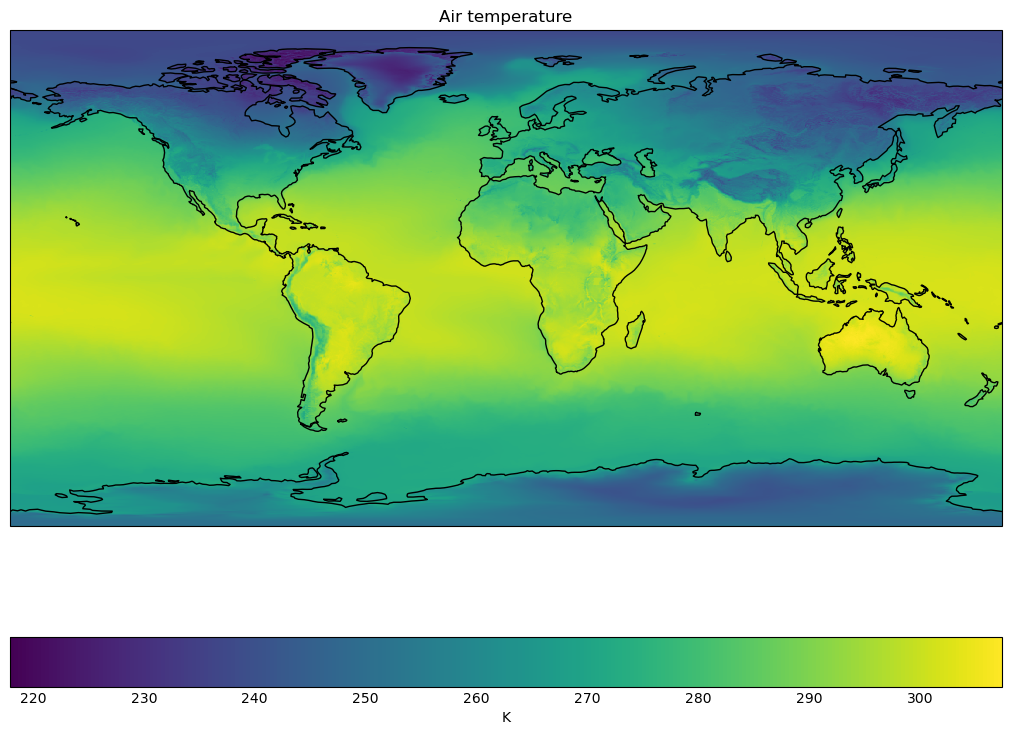

In [29]:
fig = plt.figure(figsize=[12.8, 9.6])
qplt.pcolormesh(tas[0, ...])
plt.draw()
__ = plt.gca().coastlines()  # __ hides the return value in Notebooks

### Time mean

Calculate the area weighted global mean at each time slice and plot this series.

In [32]:
grid_areas = iris.analysis.cartography.area_weights(tas)
global_mean = tas.collapsed(
        ["latitude", "longitude"], iris.analysis.MEAN, weights=grid_areas
    )

In [34]:
print(tas.summary(shorten=True))
print(global_mean.summary(shorten=True))

air_temperature / (K)               (time: 24; latitude: 960; longitude: 1280)
air_temperature / (K)               (time: 24)


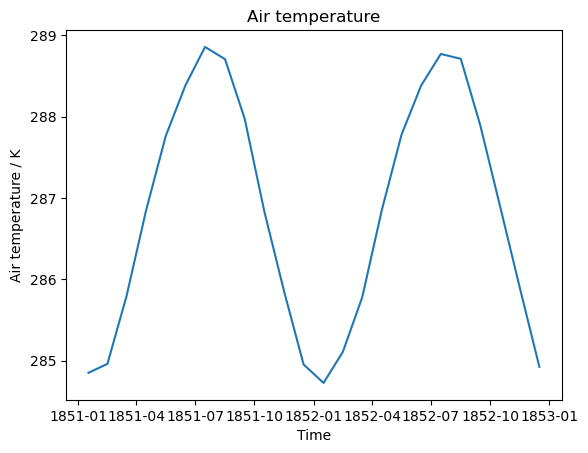

In [36]:
fig = plt.figure()
qplt.plot(global_mean)
plt.draw()